In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('microbes.csv') 


In [3]:
from sklearn.model_selection import train_test_split
x = df.drop('microorganisms', axis=1) 
y = df['microorganisms'] 

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train.to_csv('x_train.csv', index=False)
x_test.to_csv('x_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print(x_train.shape)
print(x_test.shape)

(24421, 25)
(6106, 25)


In [5]:
print(x_train.info)

<bound method DataFrame.info of        Unnamed: 0  Solidity  Eccentricity  EquivDiameter  Extrema  FilledArea  \
27271       27271     14.30          13.2           4.72    13.20      0.4790   
13112       13112     12.70          18.9           1.41    12.80      0.0372   
29047       29047      9.45          17.6           4.74     2.14      0.6880   
6576         6576      5.56          13.4          11.20    15.80      2.4600   
13589       13589     16.70          20.5           1.68    10.90      0.0579   
...           ...       ...           ...            ...      ...         ...   
17289       17289      3.60          18.0          10.20    18.10      2.0300   
5192         5192     12.80          20.3           2.37     2.53      0.1120   
12172       12172     10.70          18.9           3.53     5.55      0.4310   
235           235      7.22          16.8           1.22     9.77      0.0295   
29733       29733      3.06          21.7           3.31     8.85      0.1970

In [6]:
from sklearn.preprocessing import MinMaxScaler 
x_train = MinMaxScaler().fit_transform(x_train) 
x_test = MinMaxScaler().fit_transform(x_test)

In [7]:
from sklearn.neural_network import MLPClassifier
nn_microorganism = MLPClassifier(hidden_layer_sizes=(15,10), max_iter=1050, alpha=0.01, activation='tanh', 
                                 learning_rate_init=0.05, solver='adam')
nn_microorganism.fit(x_train, y_train)

MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(15, 10),
              learning_rate_init=0.05, max_iter=1050)

In [8]:
y_pred = nn_microorganism.predict(x_test)

In [9]:
from sklearn.metrics import accuracy_score
round(accuracy_score(y_test, y_pred), 5)
round(accuracy_score(y_test, y_pred) * 100, 5)

87.58598

In [10]:
import matplotlib.pyplot as plt


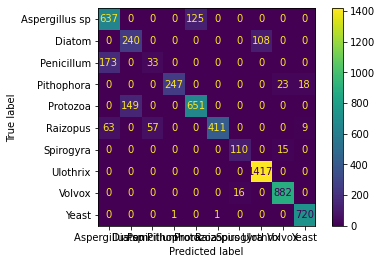

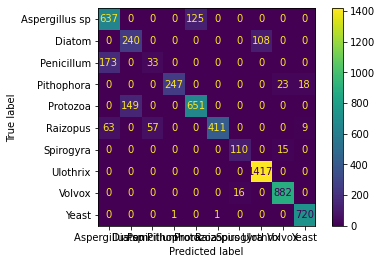

                precision    recall  f1-score   support

Aspergillus sp       0.73      0.84      0.78       762
        Diatom       0.62      0.69      0.65       348
    Penicillum       0.37      0.16      0.22       206
    Pithophora       1.00      0.86      0.92       288
      Protozoa       0.84      0.81      0.83       800
      Raizopus       1.00      0.76      0.86       540
     Spirogyra       0.87      0.88      0.88       125
      Ulothrix       0.93      1.00      0.96      1417
        Volvox       0.96      0.98      0.97       898
         Yeast       0.96      1.00      0.98       722

      accuracy                           0.88      6106
     macro avg       0.83      0.80      0.81      6106
  weighted avg       0.87      0.88      0.87      6106



In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
ConfusionMatrixDisplay.from_estimator(nn_microorganism, x_test, y_test).plot()
plt.show()
print(classification_report(y_test, y_pred))


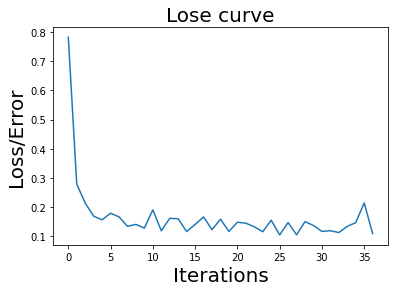

In [12]:
import matplotlib.pyplot as plt
plt.plot(nn_microorganism.loss_curve_)
plt.title('Lose curve', fontsize=20)
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('Loss/Error', fontsize=20)
plt.show()